In [44]:
# Required Libraries
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import nltk
nltk.download('punkt')
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ehtas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ehtas\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [45]:
# Read the survey responses into a DataFrame
df = pd.read_csv(r"C:\Users\ehtas\Downloads\ThesisCode\MPSdata.csv")

In [46]:
df.head(6)

,Email Address,What is your country of residence?,What is your age range?,How often do you use mobile payment services to make transactions?,Which mobile payment service do you use the most?,What types of transactions do you use mobile payments for?,What motivates you to use mobile payment services?,Which of the following best describes your opinion on the transparency of fees and charges in your country?,How do you feel about the compatibility of mobile payment services with your smartphone and other devices?,Have you ever experienced a fraudulent transaction using mobile payment services?,What is the most common way you make payments for everyday purchases?,What is your primary concern when it comes to using mobile payment services?,How do you perceive the ease of using mobile payment services?,How do you perceive the risk of using mobile payment services?,How much do you trust mobile payment services?,How much do you think government policies have contributed to the popularity of mobile payment services in your country?,To what extent do you believe social influence affects the adoption of mobile payment services?,"To what extent do promotions or incentives (e.g., discounts, cashback) play a role in the adoption of mobile payment services?",Do you think mobile payment services will eventually replace traditional payment methods?,Additional Comments/Feedback (optional)
0,awaisbashir95@gmail.com,Germany,18-24,Daily,"Apple Pay, Google Pay, PayPal","In-store purchases, Online shopping, Bill paym...","Convenience and ease of use, Faster transactio...",Somewhat transparent,Somewhat compatible,Yes,Credit/debit card,Security and privacy,Neutral,High,Somewhat trust,Significantly,To a small extent,Moderately significant,Yes,NaN
1,micheld@rptu.de,Germany,18-24,Weekly,PayPal,"Online shopping, Bill payments, Peer-to-peer t...","Convenience and ease of use, Security and prot...",Very transparent,Completely compatible,No,Credit/debit card,Security and privacy,Easy,Neutral,Somewhat trust,Moderately,To a moderate extent,Moderately significant,Unsure,NaN
2,vif26siv@rhru.uni-kl.de,Germany,18-24,Weekly,"Apple Pay, PayPal","Online shopping, Bill payments","Convenience and ease of use, Security and prot...",Somewhat transparent,Somewhat compatible,Yes,Credit/debit card,Security and privacy,Easy,Neutral,Somewhat trust,Moderately,To a small extent,Moderately significant,Yes,NaN
3,grosjohannes029@gmail.com,Germany,18-24,Monthly,PayPal,Bill payments,Faster transaction times compared to tradition...,Neutral,Somewhat compatible,Yes,Cash,Security and privacy,Easy,High,Somewhat trust,Slightly,To a great extent,Somewhat significant,Yes,NaN
4,awaischdry@gmail.com,Sweden,25-34,Daily,Apple Pay,"In-store purchases, Bill payments",Availability of mobile payment options at more...,Very transparent,Completely compatible,Yes,Mobile payment services,Security and privacy,Easy,Low,Completely trust,Significantly,To a small extent,Not significant,Yes,NaN
5,Parsalaraib@gmail.com,Germany,18-24,Monthly,PayPal,Online shopping,Convenience and ease of use,Somewhat transparent,Completely compatible,No,Credit/debit card,Security and privacy,Very easy,Low,Somewhat trust,Significantly,To a moderate extent,Moderately significant,Yes,NaN


In [47]:
# Filter out only the 5 countries you're interested in
countries = ["Sweden","Estonia", "Germany", "Pakistan", "Sri Lanka"]
df = df[df['What is your country of residence?'].apply(lambda x: x in countries)]

In [48]:
# Creating a new feature 'Country Type'
df['Country Type'] = df['What is your country of residence?'].apply(lambda x: 'Developed' if x in ["Sweden", "Estonia", "Germany"] else 'Developing')

In [49]:
# Preprocess the text
df['feedback_clean'] = df['Additional Comments/Feedback (optional)'].str.lower().str.replace('[^\w\s]','')

C:\Users\ehtas\AppData\Local\Temp\ipykernel_17188\1121622180.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['feedback_clean'] = df['Additional Comments/Feedback (optional)'].str.lower().str.replace('[^\w\s]','')


In [50]:
# Fill NaN with empty string
df['feedback_clean'] = df['feedback_clean'].fillna('')

# Now apply the tokenization
df['feedback_tokens'] = df['feedback_clean'].apply(word_tokenize)


In [51]:
# Drop rows with missing 'feedback_clean' values
df = df.dropna(subset=['feedback_clean'])

# Now apply the tokenization
df['feedback_tokens'] = df['feedback_clean'].apply(word_tokenize)

In [52]:
# Calculate word frequencies
fdist = FreqDist(sum(df['feedback_tokens'].tolist(), []))
print(fdist.most_common(10))  # prints 10 most common words

[('payment', 5), ('good', 5), ('mobile', 4), ('to', 4), ('no', 3), ('have', 3), ('on', 2), ('in', 2), ('services', 2), ('a', 2)]


In [53]:
# Create a SentimentIntensityAnalyzer object
sia = SentimentIntensityAnalyzer()

In [54]:
# Calculate sentiment scores
df['sentiment_scores'] = df['feedback_clean'].apply(lambda feedback: sia.polarity_scores(feedback))

# Extract compound score for each feedback
df['compound_score'] = df['sentiment_scores'].apply(lambda score_dict: score_dict['compound'])

# Compare average compound score between Developed and Developing countries
print(df.groupby('Country Type')['compound_score'].mean())

Country Type
Developed     0.002801
Developing    0.029173
Name: compound_score, dtype: float64


In [55]:
print(df.columns)

Index(['Email Address', 'What is your country of residence?',
       'What is your age range?',
       'How often do you use mobile payment services to make transactions?',
       'Which mobile payment service do you use the most? ',
       'What types of transactions do you use mobile payments for?',
       'What motivates you to use mobile payment services?',
       'Which of the following best describes your opinion on the transparency of fees and charges in your country?',
       'How do you feel about the compatibility of mobile payment services with your smartphone and other devices?',
       'Have you ever experienced a fraudulent transaction using mobile payment services?',
       'What is the most common way you make payments for everyday purchases?',
       'What is your primary concern when it comes to using mobile payment services?',
       'How do you perceive the ease of using mobile payment services?',
       'How do you perceive the risk of using mobile payment services

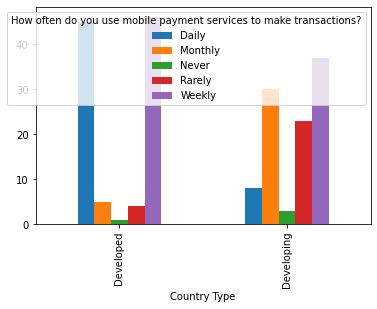

In [56]:
df.groupby(['Country Type', 'How often do you use mobile payment services to make transactions?']).size().unstack().plot(kind='bar', stacked=False)
plt.show()

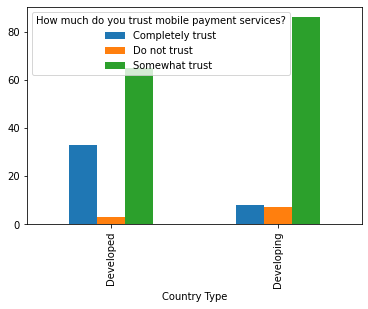

In [57]:
# Compare trust levels in mobile payment systems
df.groupby(['Country Type', 'How much do you trust mobile payment services?']).size().unstack().plot(kind='bar', stacked=False)
plt.show()

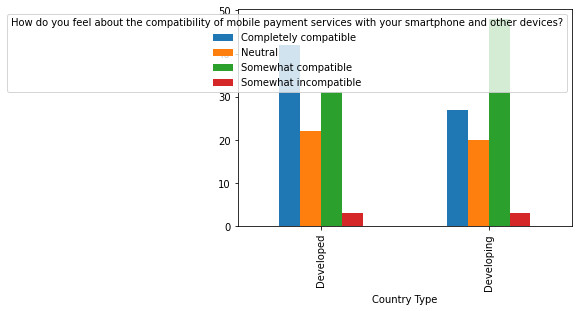

In [58]:
# Compare trust levels in mobile payment systems
df.groupby(['Country Type', 'How do you feel about the compatibility of mobile payment services with your smartphone and other devices?']).size().unstack().plot(kind='bar', stacked=False)
plt.show()

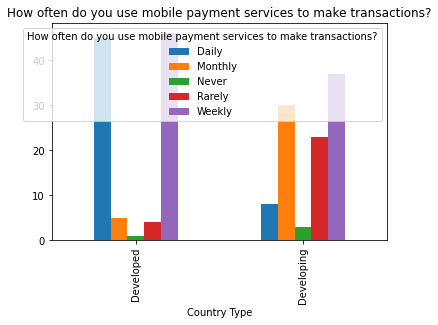

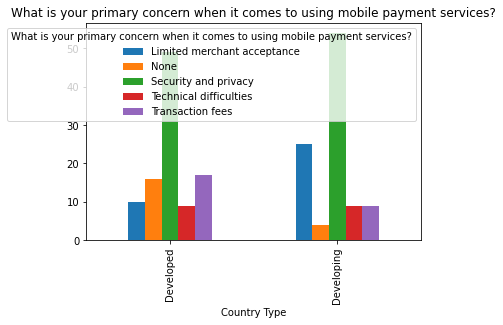

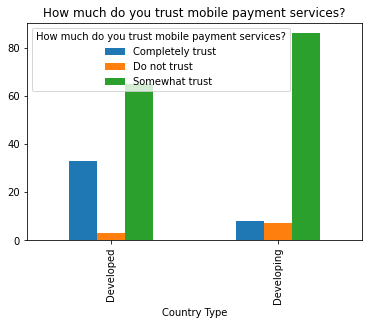

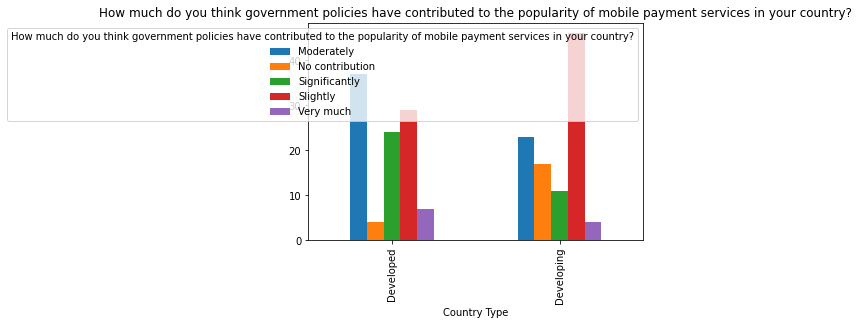

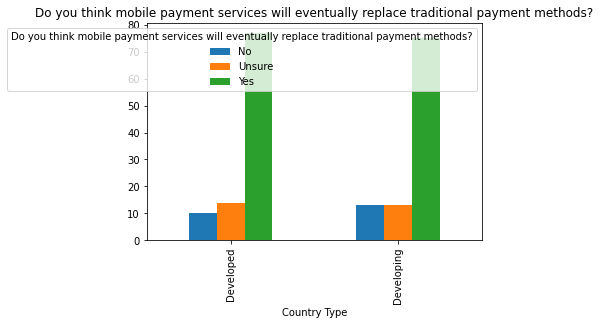

In [59]:
# Let's start by creating a list of column names we're interested in.
columns_of_interest = [
    'How often do you use mobile payment services to make transactions?',
    'What is your primary concern when it comes to using mobile payment services?',
    'How much do you trust mobile payment services?',
    'How much do you think government policies have contributed to the popularity of mobile payment services in your country?',
    'Do you think mobile payment services will eventually replace traditional payment methods?'
]

# Now let's analyze these features.
for column in columns_of_interest:
    df.groupby(['Country Type', column]).size().unstack().plot(kind='bar', stacked=False)
    plt.title(column)
    plt.show()

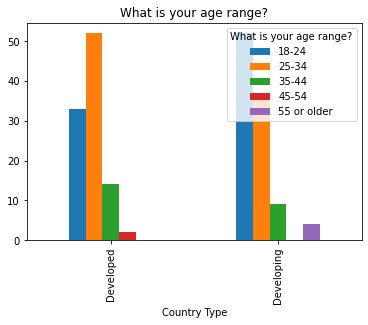

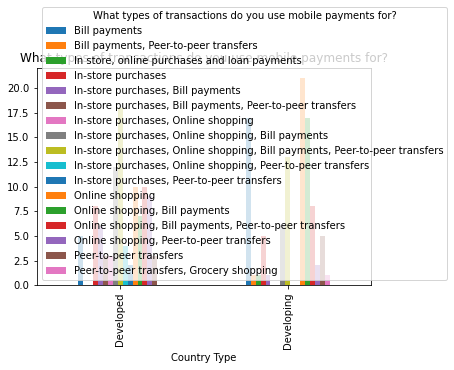

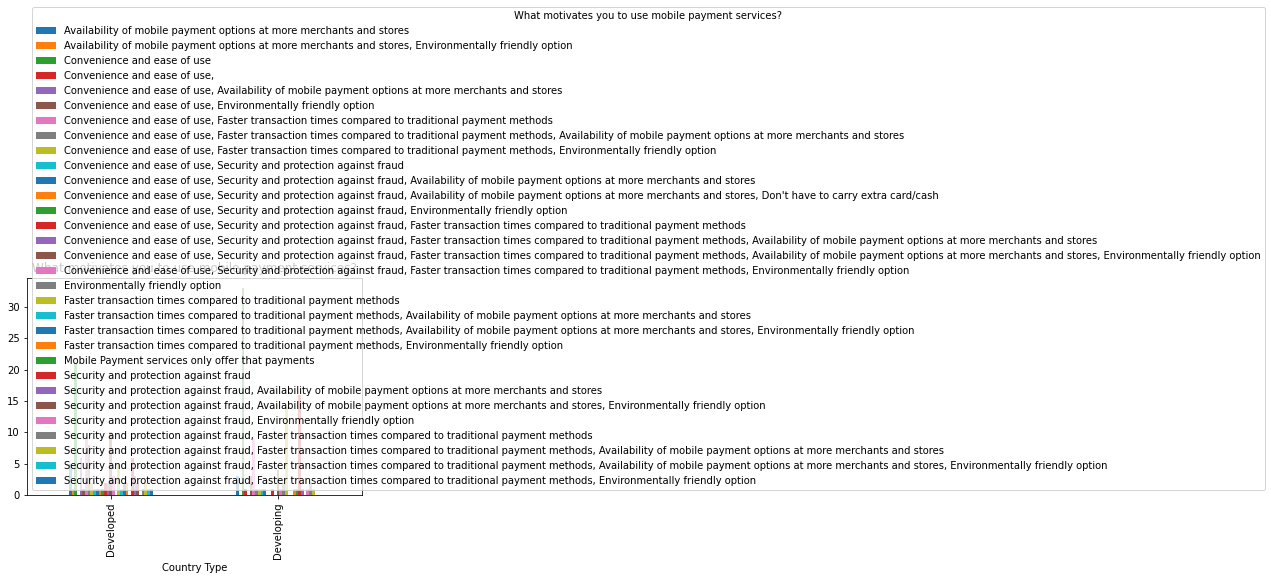

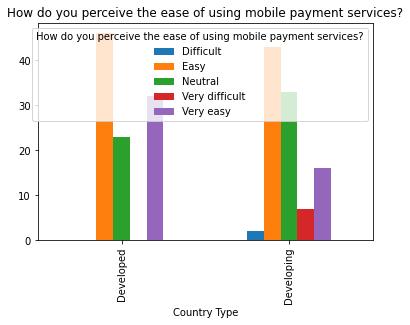

In [60]:
# Let's start by creating a list of column names we're interested in.
columns_of_interest = [
    'What is your age range?',
    'What types of transactions do you use mobile payments for?',
    'What motivates you to use mobile payment services?',
    'How do you perceive the ease of using mobile payment services?',
]

# Now let's analyze these features.
for column in columns_of_interest:
    df.groupby(['Country Type', column]).size().unstack().plot(kind='bar', stacked=False)
    plt.title(column)
    plt.show()

In [61]:
# Show basic descriptive statistics for numerical columns
print(df.describe())

# Show frequency of categories in each categorical column
for column in df.select_dtypes(include=['object']).columns:
    print("\nFrequency of categories in column: ", column)
    print(df[column].value_counts())

# Check for missing values in all columns
print("\nMissing values in each column:")
print(df.isnull().sum())

       compound_score
count      202.000000
mean         0.015987
std          0.125771
min         -0.542300
25%          0.000000
50%          0.000000
75%          0.000000
max          0.868900

Frequency of categories in column:  Email Address
awaisbashir95@gmail.com         1
kushansadeepa28@gmail.com       1
sugathabeyrathna1@gmail.com     1
kaweenanjana@gmail.com          1
vihangarashminda22@gmail.com    1
                               ..
davidhak@live.se                1
umairarslanshah@gmail.com       1
petra.friedmann@gmail.com       1
iqrashamim1996@gmail.com        1
kairipaju@gmail.com             1
Name: Email Address, Length: 202, dtype: int64

Frequency of categories in column:  What is your country of residence?
Pakistan     53
Sri Lanka    48
Sweden       37
Germany      33
Estonia      31
Name: What is your country of residence?, dtype: int64

Frequency of categories in column:  What is your age range?
25-34          88
18-24          85
35-44          23
55 or ol

In [62]:
# Show basic descriptive statistics for numerical columns
print(df.describe())

# Show frequency of categories in each categorical column
for column in df.select_dtypes(include=['object']).columns:
    print("\nFrequency of categories in column: ", column)
    print(df[column].value_counts())

# Check for missing values in all columns
print("\nMissing values in each column:")
print(df.isnull().sum())

       compound_score
count      202.000000
mean         0.015987
std          0.125771
min         -0.542300
25%          0.000000
50%          0.000000
75%          0.000000
max          0.868900

Frequency of categories in column:  Email Address
awaisbashir95@gmail.com         1
kushansadeepa28@gmail.com       1
sugathabeyrathna1@gmail.com     1
kaweenanjana@gmail.com          1
vihangarashminda22@gmail.com    1
                               ..
davidhak@live.se                1
umairarslanshah@gmail.com       1
petra.friedmann@gmail.com       1
iqrashamim1996@gmail.com        1
kairipaju@gmail.com             1
Name: Email Address, Length: 202, dtype: int64

Frequency of categories in column:  What is your country of residence?
Pakistan     53
Sri Lanka    48
Sweden       37
Germany      33
Estonia      31
Name: What is your country of residence?, dtype: int64

Frequency of categories in column:  What is your age range?
25-34          88
18-24          85
35-44          23
55 or ol


Country comparison for: How often do you use mobile payment services to make transactions?
How often do you use mobile payment services to make transactions?  Daily  \
What is your country of residence?                                          
Estonia                                                              12.0   
Germany                                                              11.0   
Pakistan                                                              4.0   
Sri Lanka                                                             4.0   
Sweden                                                               22.0   

How often do you use mobile payment services to make transactions?  Monthly  \
What is your country of residence?                                            
Estonia                                                                 1.0   
Germany                                                                 2.0   
Pakistan                                            

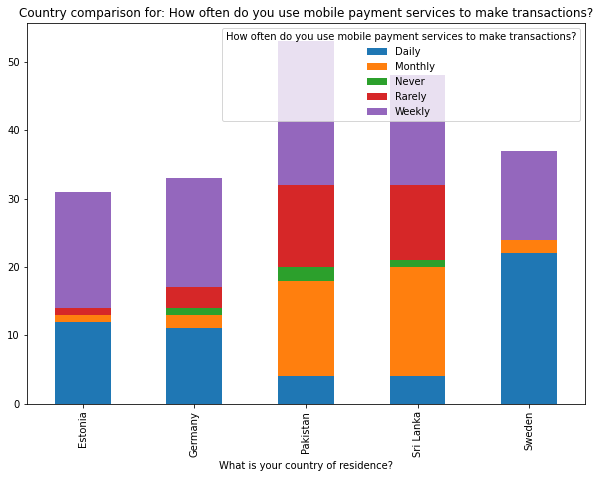


Country comparison for: Which mobile payment service do you use the most? 
Which mobile payment service do you use the most?   ABL  Apple Pay  \
What is your country of residence?                                   
Estonia                                             NaN        3.0   
Germany                                             NaN        3.0   
Pakistan                                            1.0        5.0   
Sri Lanka                                           NaN        1.0   
Sweden                                              NaN       11.0   

Which mobile payment service do you use the most?   Apple Pay,   \
What is your country of residence?                                
Estonia                                                     NaN   
Germany                                                     NaN   
Pakistan                                                    NaN   
Sri Lanka                                                   NaN   
Sweden                         

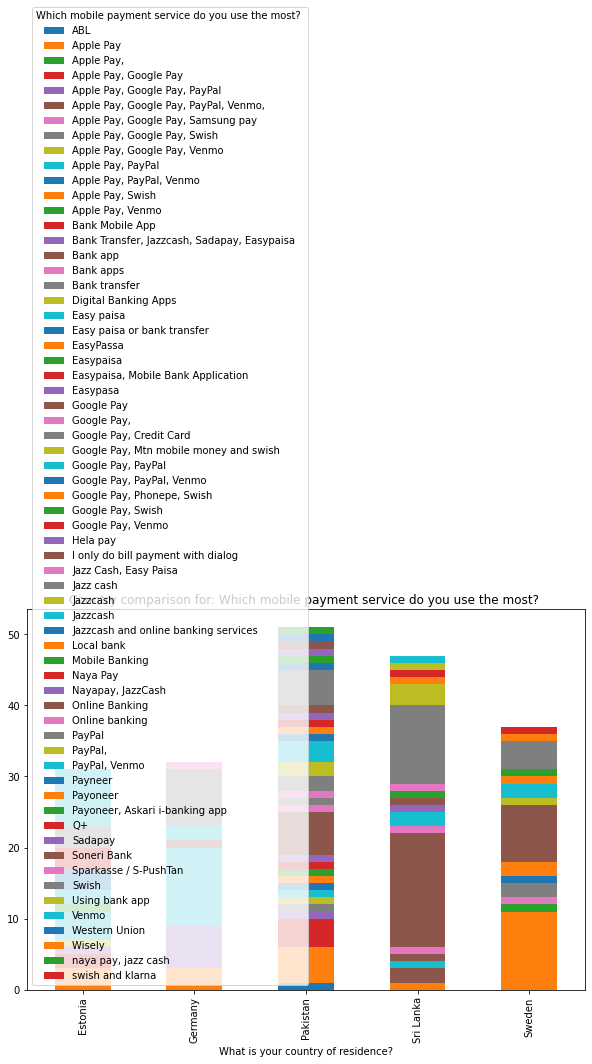


Country comparison for: What is the most common way you make payments for everyday purchases?
What is the most common way you make payments for everyday purchases?  Cash  \
What is your country of residence?                                            
Estonia                                                                 1.0   
Germany                                                                10.0   
Pakistan                                                               50.0   
Sri Lanka                                                              32.0   
Sweden                                                                  1.0   

What is the most common way you make payments for everyday purchases?  Credit/debit card  \
What is your country of residence?                                                         
Estonia                                                                             14.0   
Germany                                                                    

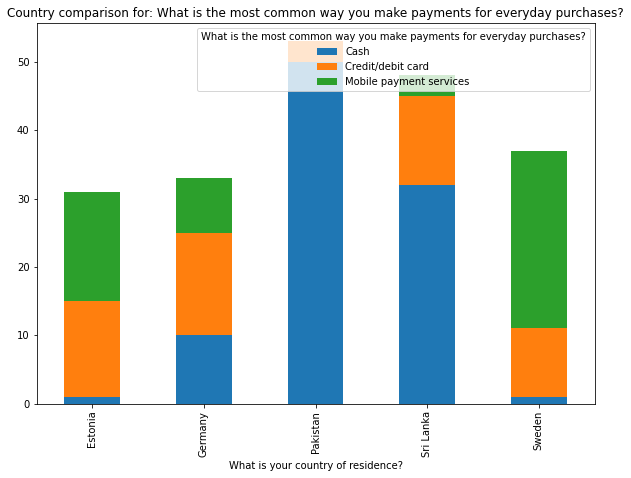


Country comparison for: Do you think mobile payment services will eventually replace traditional payment methods?
Do you think mobile payment services will eventually replace traditional payment methods?  No  \
What is your country of residence?                                                              
Estonia                                                                                     2   
Germany                                                                                     2   
Pakistan                                                                                    8   
Sri Lanka                                                                                   5   
Sweden                                                                                      6   

Do you think mobile payment services will eventually replace traditional payment methods?  Unsure  \
What is your country of residence?                                                                  
Est

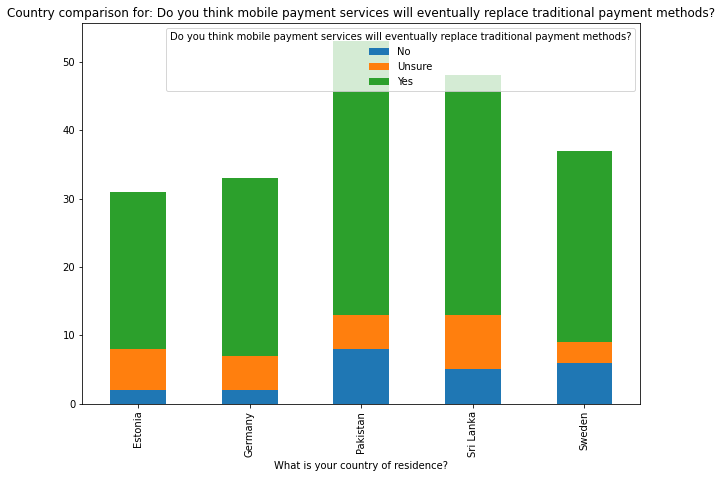

In [63]:
# List of columns to compare
columns_to_compare = ['How often do you use mobile payment services to make transactions?',
                      'Which mobile payment service do you use the most? ',
                      'What is the most common way you make payments for everyday purchases?',
                      'Do you think mobile payment services will eventually replace traditional payment methods?']

# Loop through each column and compare the responses of different countries
for col in columns_to_compare:
    print(f"\nCountry comparison for: {col}")
    country_comparison = df.groupby(['What is your country of residence?', col]).size().unstack()
    print(country_comparison)

    # Plot the comparison
    country_comparison.plot(kind='bar', stacked=True, figsize=(10,7))
    plt.title(f"Country comparison for: {col}")
    plt.show()

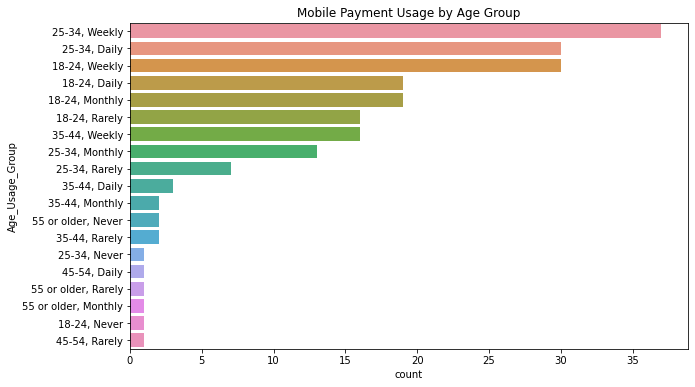

In [64]:
df['Age_Usage_Group'] = df['What is your age range?'] + ', ' + df['How often do you use mobile payment services to make transactions?']

plt.figure(figsize=(10,6))
sns.countplot(y = 'Age_Usage_Group', data = df, order = df['Age_Usage_Group'].value_counts().index)
plt.title('Mobile Payment Usage by Age Group')
plt.show()

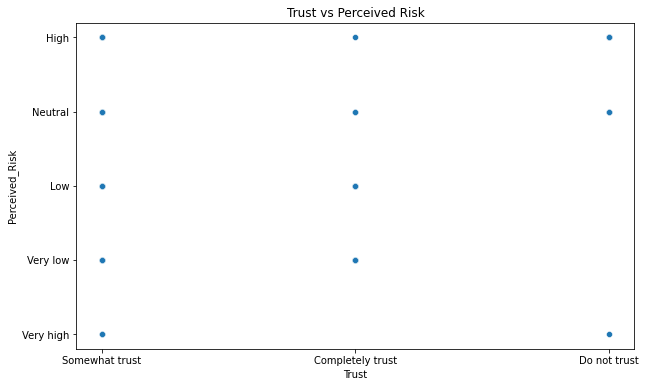

In [65]:
df['Trust'] = df['How much do you trust mobile payment services?']
df['Perceived_Risk'] = df['How do you perceive the risk of using mobile payment services?']

plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Trust', y = 'Perceived_Risk', data = df)
plt.title('Trust vs Perceived Risk')
plt.show()

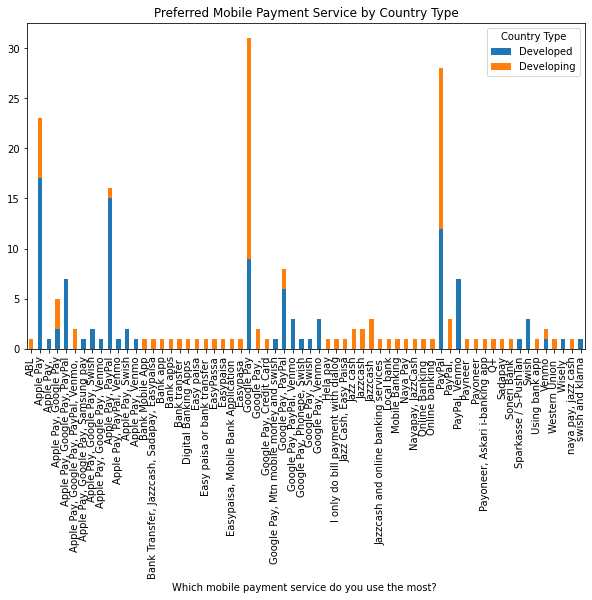

In [66]:
payment_preference = pd.crosstab(df['Which mobile payment service do you use the most? '], df['Country Type'])
payment_preference.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Preferred Mobile Payment Service by Country Type')
plt.show()

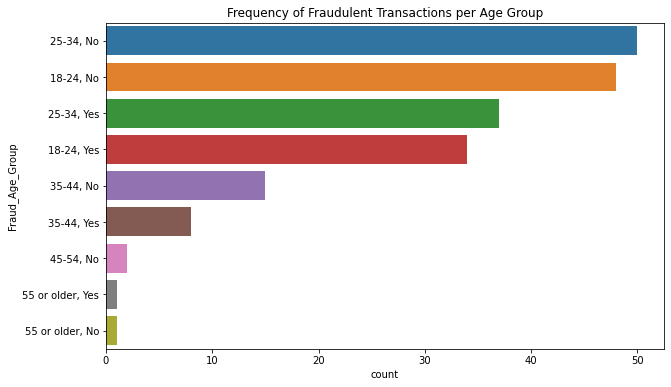

In [67]:
df['Fraud_Age_Group'] = df['What is your age range?'] + ', ' + df['Have you ever experienced a fraudulent transaction using mobile payment services?']

plt.figure(figsize=(10,6))
sns.countplot(y = 'Fraud_Age_Group', data = df, order = df['Fraud_Age_Group'].value_counts().index)
plt.title('Frequency of Fraudulent Transactions per Age Group')
plt.show()


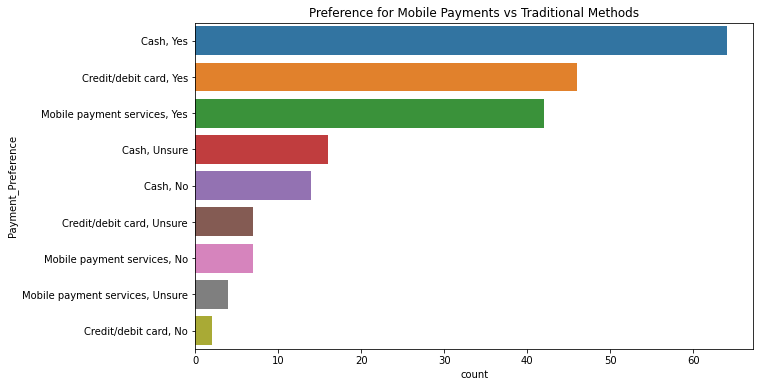

In [68]:
df['Payment_Preference'] = df['What is the most common way you make payments for everyday purchases?'] + ', ' + df['Do you think mobile payment services will eventually replace traditional payment methods?']

plt.figure(figsize=(10,6))
sns.countplot(y = 'Payment_Preference', data = df, order = df['Payment_Preference'].value_counts().index)
plt.title('Preference for Mobile Payments vs Traditional Methods')
plt.show()

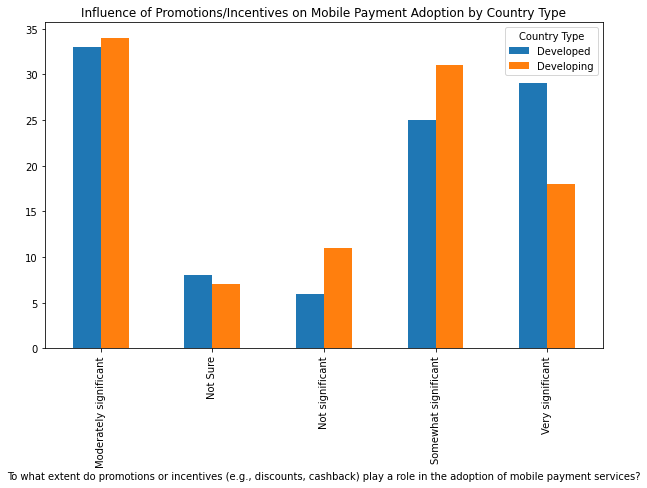

In [69]:
incentive_impact = pd.crosstab(df['To what extent do promotions or incentives (e.g., discounts, cashback) play a role in the adoption of mobile payment services?'], df['Country Type'])

incentive_impact.plot(kind='bar', stacked=False, figsize=(10,6))
plt.title('Influence of Promotions/Incentives on Mobile Payment Adoption by Country Type')
plt.show()

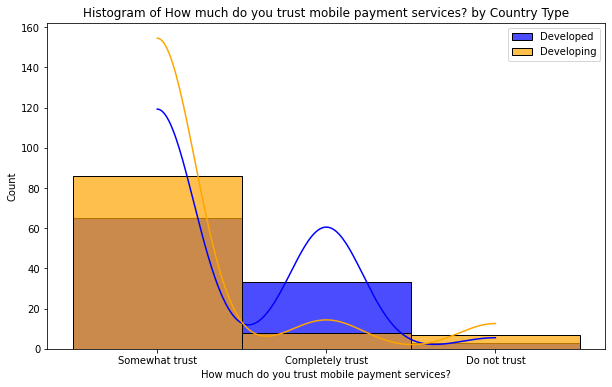

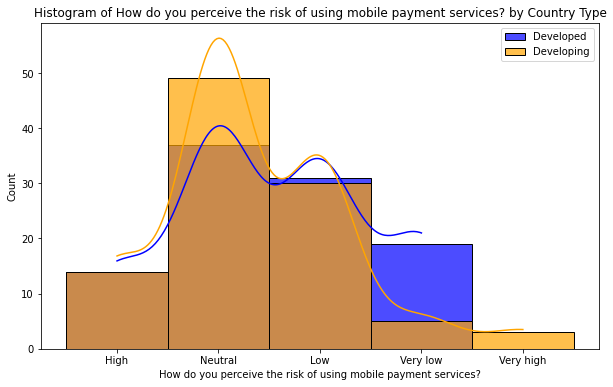

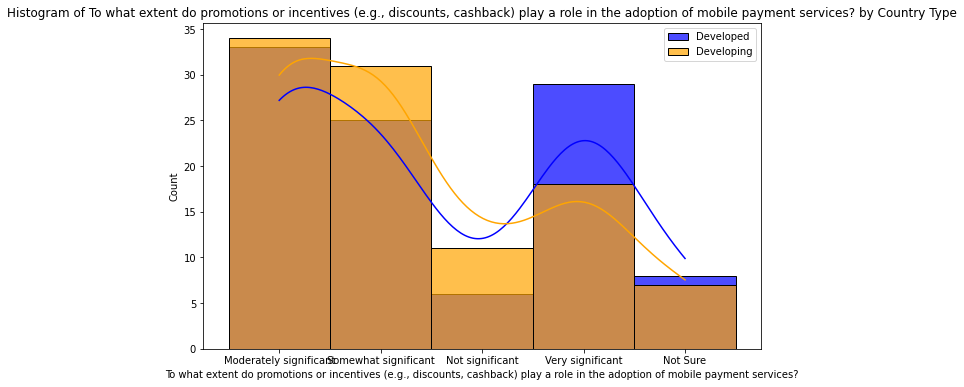

In [70]:
import seaborn as sns

# Create a new DataFrame for developed and developing countries
developed_df = df[df['Country Type'] == 'Developed']
developing_df = df[df['Country Type'] == 'Developing']

# List of columns to compare
columns_to_compare = ['How much do you trust mobile payment services?',
                      'How do you perceive the risk of using mobile payment services?',
                      'To what extent do promotions or incentives (e.g., discounts, cashback) play a role in the adoption of mobile payment services?']

# Plot histograms for each column
for col in columns_to_compare:
    plt.figure(figsize=(10, 6))
    sns.histplot(developed_df[col], kde=True, label='Developed', color='blue', alpha=0.7)
    sns.histplot(developing_df[col], kde=True, label='Developing', color='orange', alpha=0.7)
    plt.legend()
    plt.title(f'Histogram of {col} by Country Type')
    plt.show()


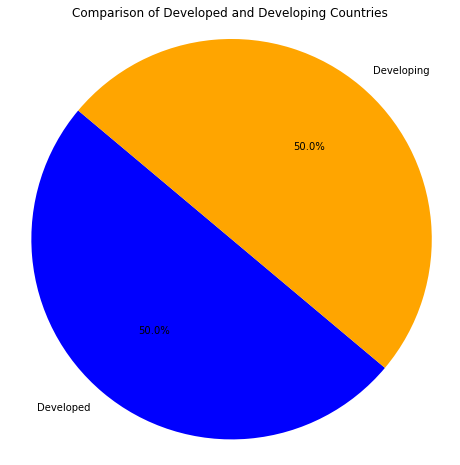

In [71]:
import matplotlib.pyplot as plt

# Count the number of responses from each country type
developed_count = len(df[df['Country Type'] == 'Developed'])
developing_count = len(df[df['Country Type'] == 'Developing'])

# Create a pie chart for country type comparison
plt.figure(figsize=(8, 8))
labels = ['Developed', 'Developing']
sizes = [developed_count, developing_count]
colors = ['blue', 'orange']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Comparison of Developed and Developing Countries')
plt.show()

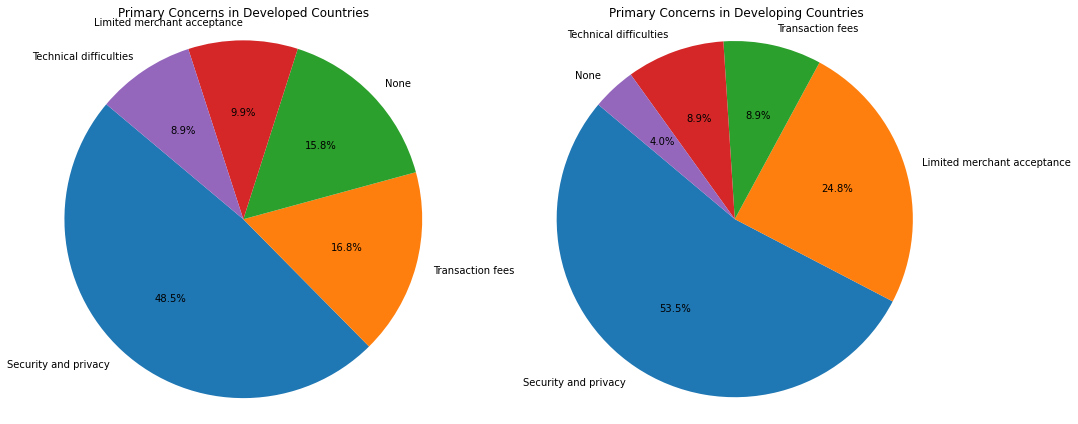

In [72]:
# Count the number of responses for primary concerns in developed and developing countries
developed_concerns = developed_df['What is your primary concern when it comes to using mobile payment services?'].value_counts()
developing_concerns = developing_df['What is your primary concern when it comes to using mobile payment services?'].value_counts()

# Create pie charts for primary concerns in developed and developing countries
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.pie(developed_concerns, labels=developed_concerns.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Primary Concerns in Developed Countries')

plt.subplot(1, 2, 2)
plt.pie(developing_concerns, labels=developing_concerns.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Primary Concerns in Developing Countries')

plt.tight_layout()
plt.show()

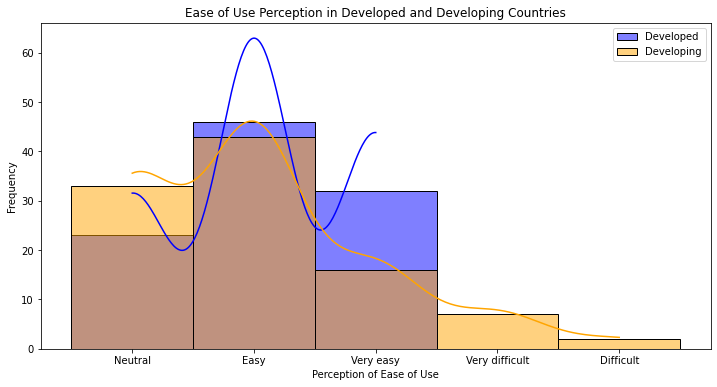

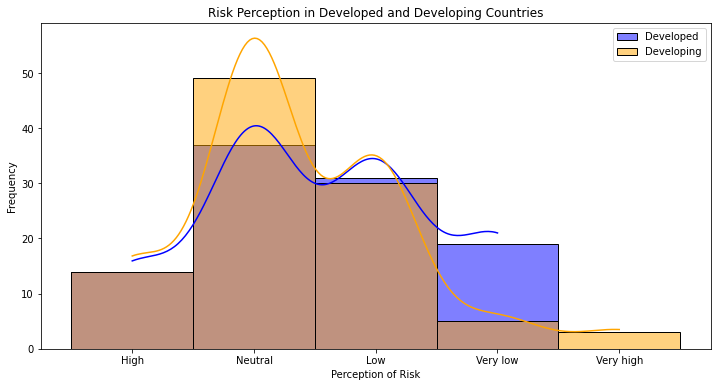

In [73]:
plt.figure(figsize=(12, 6))
sns.histplot(data=developed_df, x='How do you perceive the ease of using mobile payment services?', color='blue', label='Developed', kde=True)
sns.histplot(data=developing_df, x='How do you perceive the ease of using mobile payment services?', color='orange', label='Developing', kde=True)
plt.xlabel('Perception of Ease of Use')
plt.ylabel('Frequency')
plt.title('Ease of Use Perception in Developed and Developing Countries')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=developed_df, x='How do you perceive the risk of using mobile payment services?', color='blue', label='Developed', kde=True)
sns.histplot(data=developing_df, x='How do you perceive the risk of using mobile payment services?', color='orange', label='Developing', kde=True)
plt.xlabel('Perception of Risk')
plt.ylabel('Frequency')
plt.title('Risk Perception in Developed and Developing Countries')
plt.legend()
plt.show()

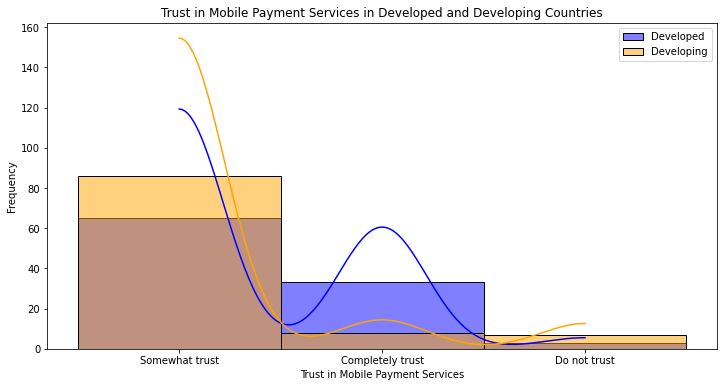

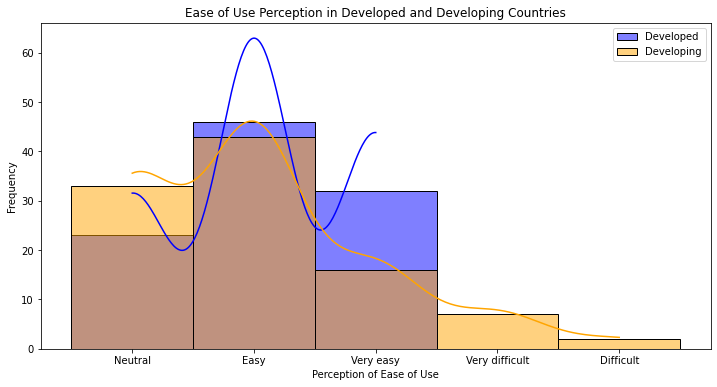

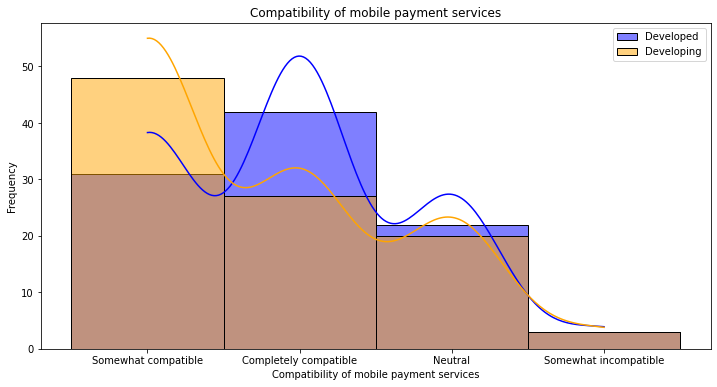

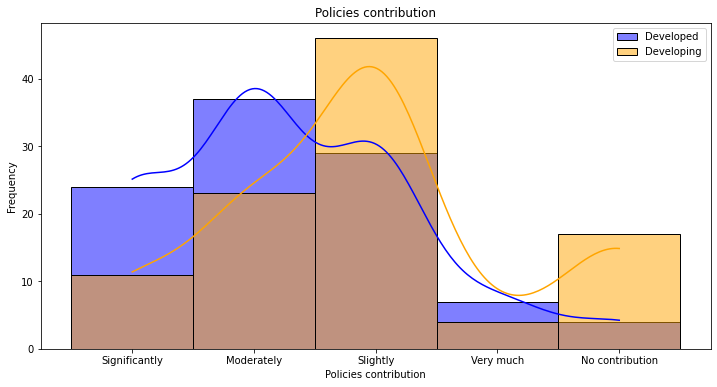

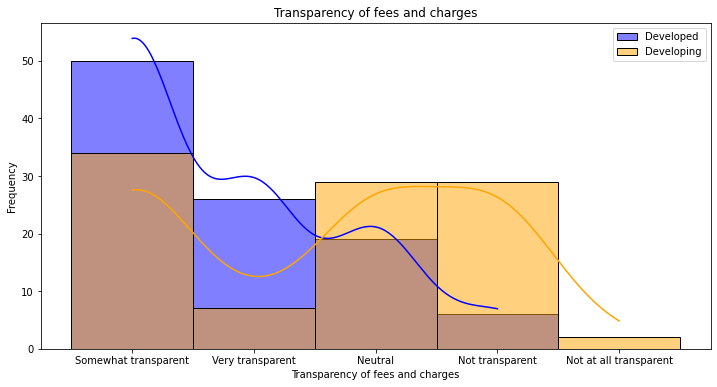

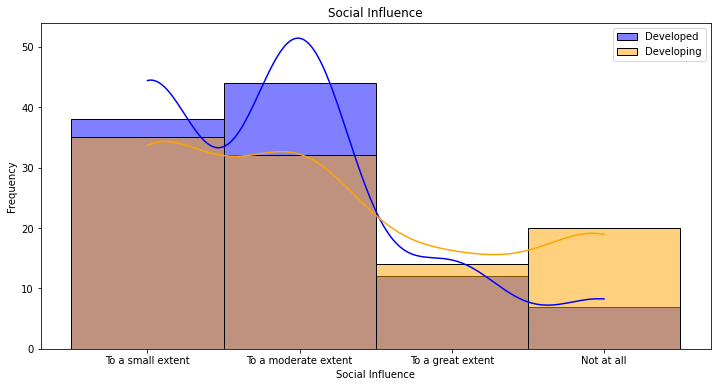

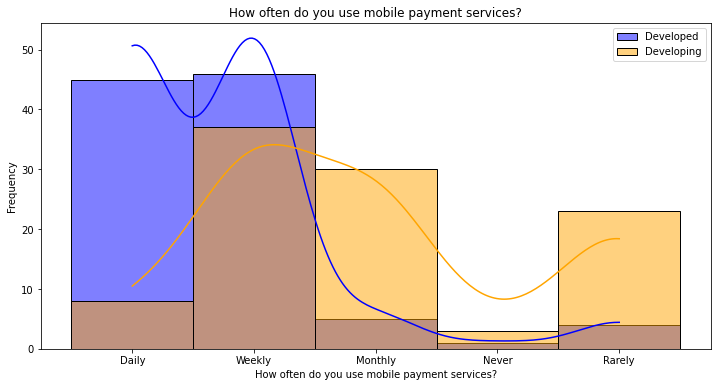

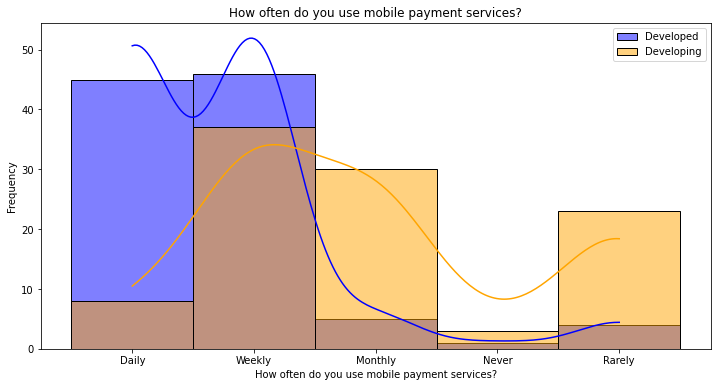

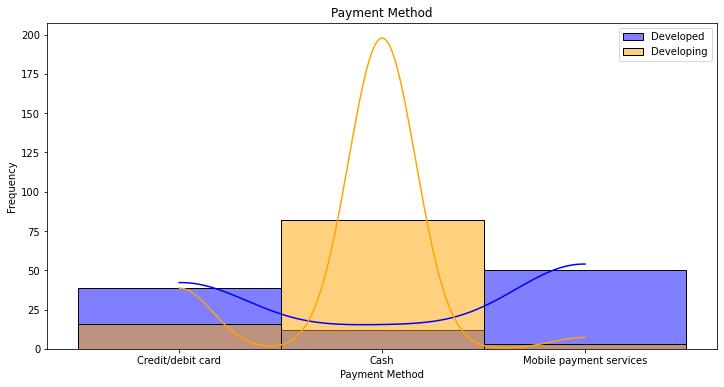

In [74]:
plt.figure(figsize=(12, 6))
sns.histplot(data=developed_df, x='How much do you trust mobile payment services?', color='blue', label='Developed', kde=True)
sns.histplot(data=developing_df, x='How much do you trust mobile payment services?', color='orange', label='Developing', kde=True)
plt.xlabel('Trust in Mobile Payment Services')
plt.ylabel('Frequency')
plt.title('Trust in Mobile Payment Services in Developed and Developing Countries')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=developed_df, x='How do you perceive the ease of using mobile payment services?', color='blue', label='Developed', kde=True)
sns.histplot(data=developing_df, x='How do you perceive the ease of using mobile payment services?', color='orange', label='Developing', kde=True)
plt.xlabel('Perception of Ease of Use')
plt.ylabel('Frequency')
plt.title('Ease of Use Perception in Developed and Developing Countries')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=developed_df, x='How do you feel about the compatibility of mobile payment services with your smartphone and other devices?', color='blue', label='Developed', kde=True)
sns.histplot(data=developing_df, x='How do you feel about the compatibility of mobile payment services with your smartphone and other devices?', color='orange', label='Developing', kde=True)
plt.xlabel('Compatibility of mobile payment services')
plt.ylabel('Frequency')
plt.title('Compatibility of mobile payment services')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=developed_df, x='How much do you think government policies have contributed to the popularity of mobile payment services in your country?', color='blue', label='Developed', kde=True)
sns.histplot(data=developing_df, x='How much do you think government policies have contributed to the popularity of mobile payment services in your country?', color='orange', label='Developing', kde=True)
plt.xlabel('Policies contribution')
plt.ylabel('Frequency')
plt.title('Policies contribution')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=developed_df, x='Which of the following best describes your opinion on the transparency of fees and charges in your country?', color='blue', label='Developed', kde=True)
sns.histplot(data=developing_df, x='Which of the following best describes your opinion on the transparency of fees and charges in your country?', color='orange', label='Developing', kde=True)
plt.xlabel('Transparency of fees and charges')
plt.ylabel('Frequency')
plt.title('Transparency of fees and charges')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=developed_df, x='To what extent do you believe social influence affects the adoption of mobile payment services?', color='blue', label='Developed', kde=True)
sns.histplot(data=developing_df, x='To what extent do you believe social influence affects the adoption of mobile payment services?', color='orange', label='Developing', kde=True)
plt.xlabel('Social Influence')
plt.ylabel('Frequency')
plt.title('Social Influence')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=developed_df, x='How often do you use mobile payment services to make transactions?', color='blue', label='Developed', kde=True)
sns.histplot(data=developing_df, x='How often do you use mobile payment services to make transactions?', color='orange', label='Developing', kde=True)
plt.xlabel('How often do you use mobile payment services?')
plt.ylabel('Frequency')
plt.title('How often do you use mobile payment services?')
plt.legend()
plt.show()


plt.figure(figsize=(12, 6))
sns.histplot(data=developed_df, x='How often do you use mobile payment services to make transactions?', color='blue', label='Developed', kde=True)
sns.histplot(data=developing_df, x='How often do you use mobile payment services to make transactions?', color='orange', label='Developing', kde=True)
plt.xlabel('How often do you use mobile payment services?')
plt.ylabel('Frequency')
plt.title('How often do you use mobile payment services?')
plt.legend()
plt.show()


plt.figure(figsize=(12, 6))
sns.histplot(data=developed_df, x='What is the most common way you make payments for everyday purchases?', color='blue', label='Developed', kde=True)
sns.histplot(data=developing_df, x='What is the most common way you make payments for everyday purchases?', color='orange', label='Developing', kde=True)
plt.xlabel('Payment Method')
plt.ylabel('Frequency')
plt.title('Payment Method')
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


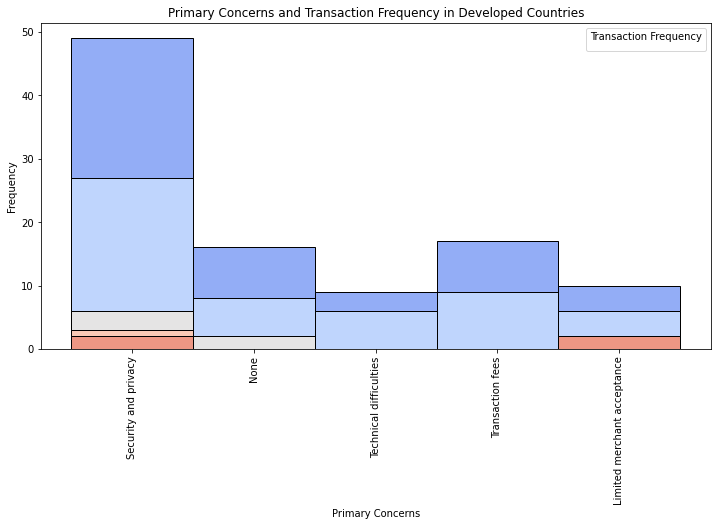

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


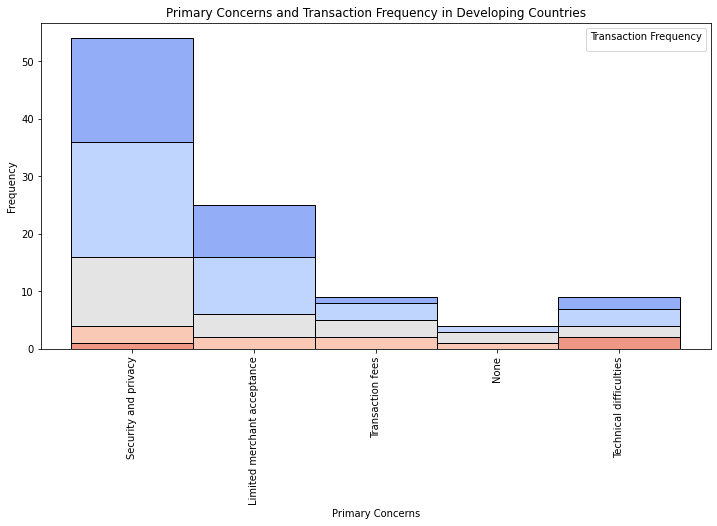

In [75]:
plt.figure(figsize=(12, 6))
sns.histplot(data=developed_df, x='What is your primary concern when it comes to using mobile payment services?', hue='How often do you use mobile payment services to make transactions?', multiple='stack', palette='coolwarm')
plt.xlabel('Primary Concerns')
plt.ylabel('Frequency')
plt.title('Primary Concerns and Transaction Frequency in Developed Countries')
plt.xticks(rotation=90)
plt.legend(title='Transaction Frequency', loc='upper right')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=developing_df, x='What is your primary concern when it comes to using mobile payment services?', hue='How often do you use mobile payment services to make transactions?', multiple='stack', palette='coolwarm')
plt.xlabel('Primary Concerns')
plt.ylabel('Frequency')
plt.title('Primary Concerns and Transaction Frequency in Developing Countries')
plt.xticks(rotation=90)
plt.legend(title='Transaction Frequency', loc='upper right')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


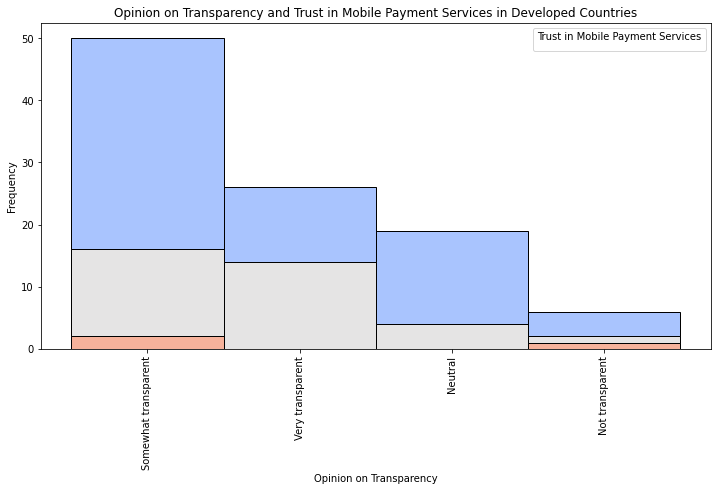

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


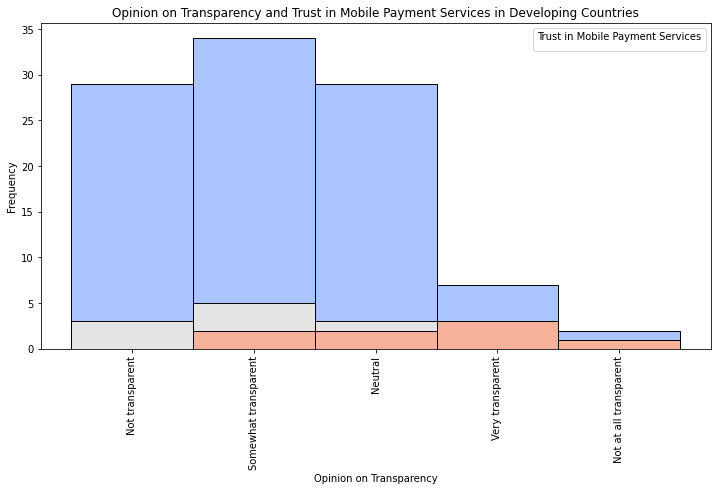

In [76]:
plt.figure(figsize=(12, 6))
sns.histplot(data=developed_df, x='Which of the following best describes your opinion on the transparency of fees and charges in your country?', hue='How much do you trust mobile payment services?', multiple='stack', palette='coolwarm')
plt.xlabel('Opinion on Transparency')
plt.ylabel('Frequency')
plt.title('Opinion on Transparency and Trust in Mobile Payment Services in Developed Countries')
plt.xticks(rotation=90)
plt.legend(title='Trust in Mobile Payment Services', loc='upper right')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=developing_df, x='Which of the following best describes your opinion on the transparency of fees and charges in your country?', hue='How much do you trust mobile payment services?', multiple='stack', palette='coolwarm')
plt.xlabel('Opinion on Transparency')
plt.ylabel('Frequency')
plt.title('Opinion on Transparency and Trust in Mobile Payment Services in Developing Countries')
plt.xticks(rotation=90)
plt.legend(title='Trust in Mobile Payment Services', loc='upper right')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


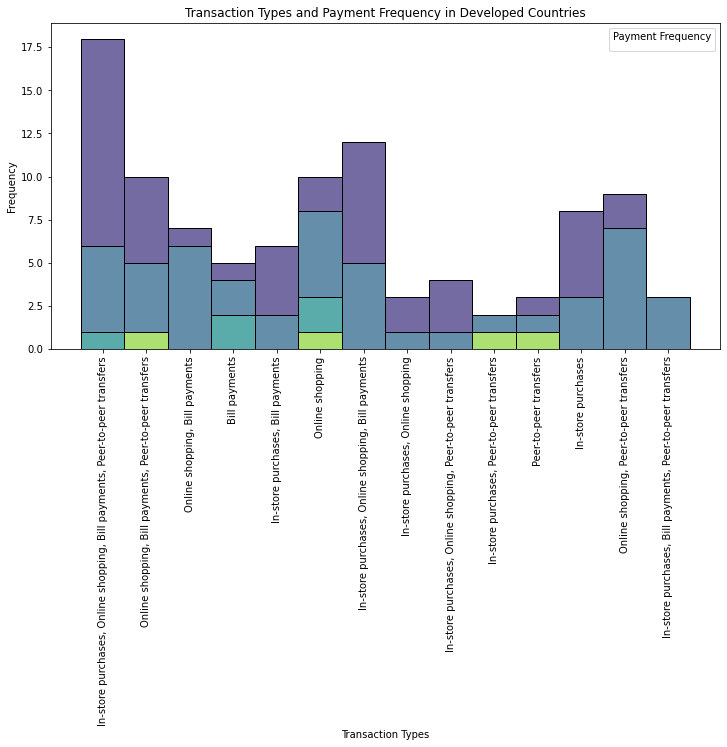

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


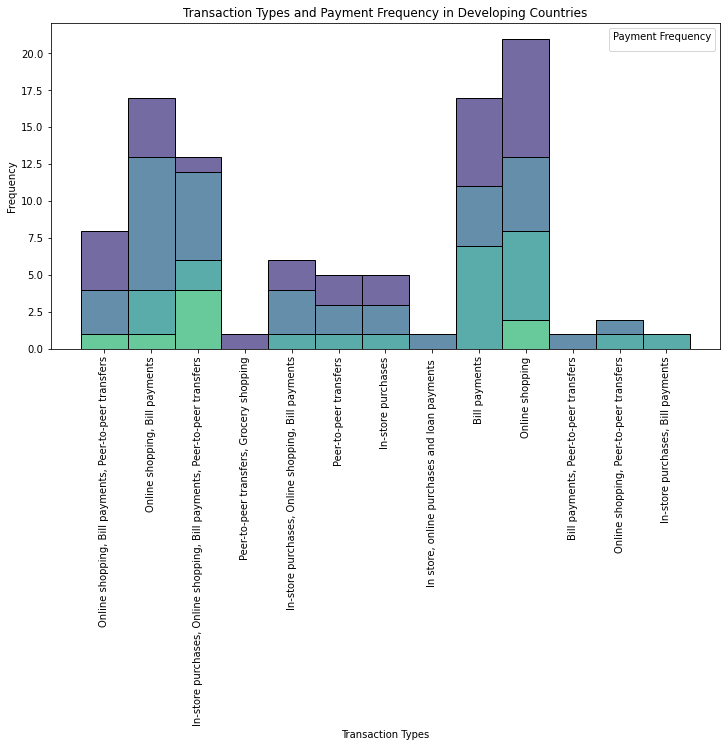

In [77]:
plt.figure(figsize=(12, 6))
sns.histplot(data=developed_df, x='What types of transactions do you use mobile payments for?', hue='How often do you use mobile payment services to make transactions?', multiple='stack', palette='viridis')
plt.xlabel('Transaction Types')
plt.ylabel('Frequency')
plt.title('Transaction Types and Payment Frequency in Developed Countries')
plt.xticks(rotation=90)
plt.legend(title='Payment Frequency', loc='upper right')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=developing_df, x='What types of transactions do you use mobile payments for?', hue='How often do you use mobile payment services to make transactions?', multiple='stack', palette='viridis')
plt.xlabel('Transaction Types')
plt.ylabel('Frequency')
plt.title('Transaction Types and Payment Frequency in Developing Countries')
plt.xticks(rotation=90)
plt.legend(title='Payment Frequency', loc='upper right')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


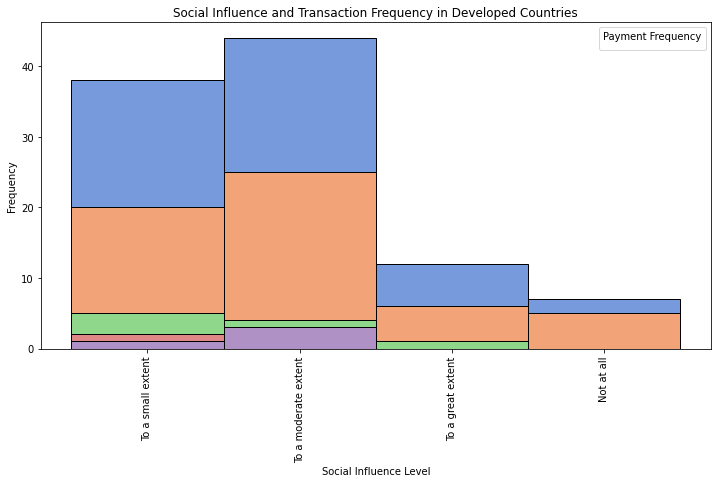

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


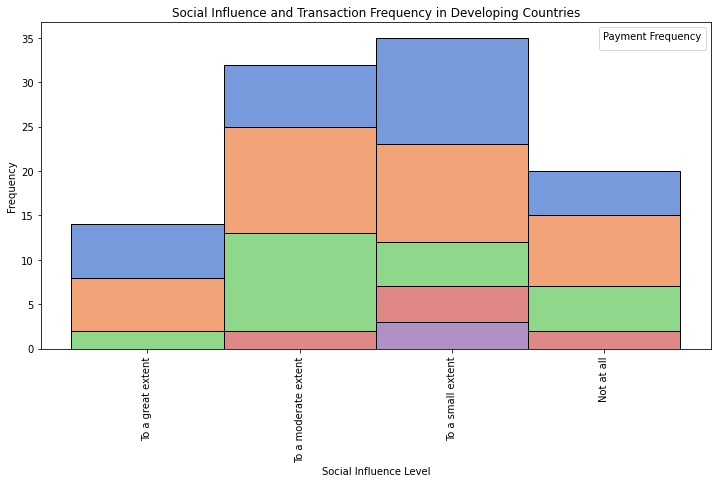

In [78]:
plt.figure(figsize=(12, 6))
sns.histplot(data=developed_df, x='To what extent do you believe social influence affects the adoption of mobile payment services?', hue='How often do you use mobile payment services to make transactions?', multiple='stack', palette='muted')
plt.xlabel('Social Influence Level')
plt.ylabel('Frequency')
plt.title('Social Influence and Transaction Frequency in Developed Countries')
plt.xticks(rotation=90)
plt.legend(title='Payment Frequency', loc='upper right')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=developing_df, x='To what extent do you believe social influence affects the adoption of mobile payment services?', hue='How often do you use mobile payment services to make transactions?', multiple='stack', palette='muted')
plt.xlabel('Social Influence Level')
plt.ylabel('Frequency')
plt.title('Social Influence and Transaction Frequency in Developing Countries')
plt.xticks(rotation=90)
plt.legend(title='Payment Frequency', loc='upper right')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


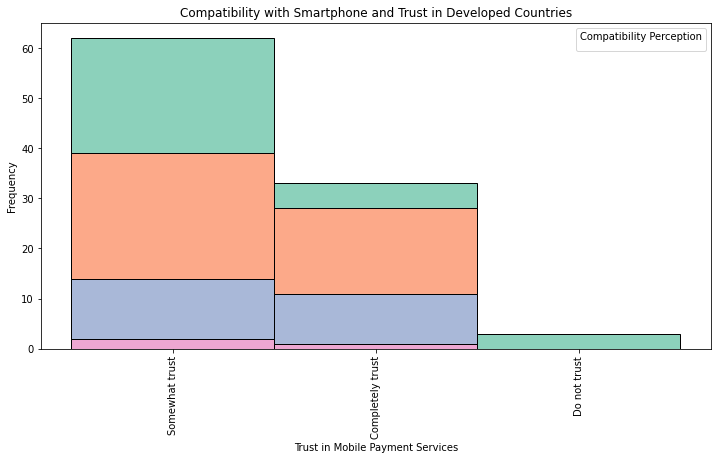

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


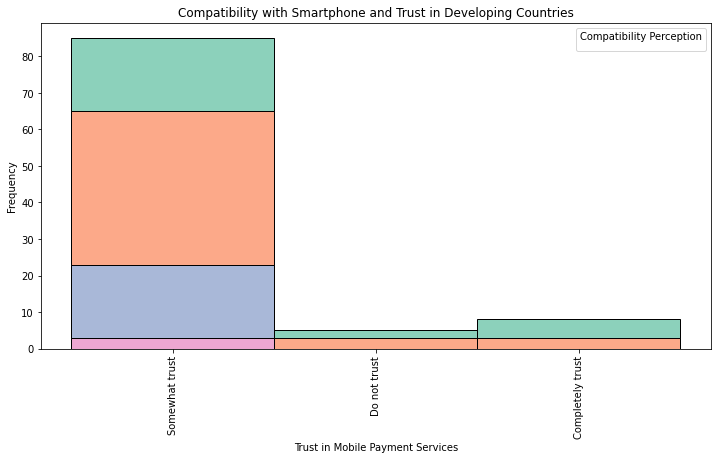

In [79]:
plt.figure(figsize=(12, 6))
sns.histplot(data=developed_df, x='How much do you trust mobile payment services?', hue='How do you feel about the compatibility of mobile payment services with your smartphone and other devices?', multiple='stack', palette='Set2')
plt.xlabel('Trust in Mobile Payment Services')
plt.ylabel('Frequency')
plt.title('Compatibility with Smartphone and Trust in Developed Countries')
plt.xticks(rotation=90)
plt.legend(title='Compatibility Perception', loc='upper right')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=developing_df, x='How much do you trust mobile payment services?', hue='How do you feel about the compatibility of mobile payment services with your smartphone and other devices?', multiple='stack', palette='Set2')
plt.xlabel('Trust in Mobile Payment Services')
plt.ylabel('Frequency')
plt.title('Compatibility with Smartphone and Trust in Developing Countries')
plt.xticks(rotation=90)
plt.legend(title='Compatibility Perception', loc='upper right')
plt.show()

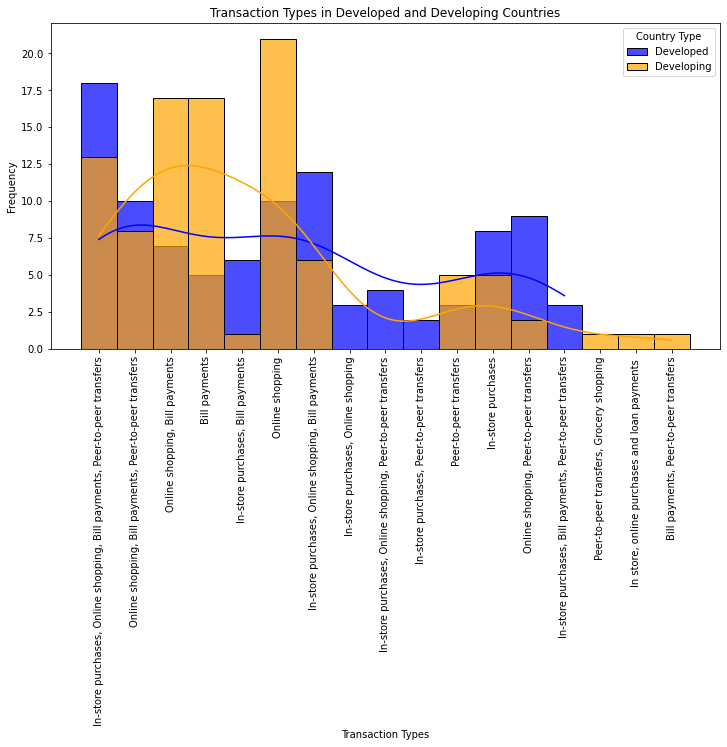

In [80]:
plt.figure(figsize=(12, 6))
sns.histplot(data=developed_df, x='What types of transactions do you use mobile payments for?', color='blue', alpha=0.7, label='Developed', kde=True)
sns.histplot(data=developing_df, x='What types of transactions do you use mobile payments for?', color='orange', alpha=0.7, label='Developing', kde=True)
plt.xlabel('Transaction Types')
plt.ylabel('Frequency')
plt.title('Transaction Types in Developed and Developing Countries')
plt.xticks(rotation=90)
plt.legend(title='Country Type')
plt.show()

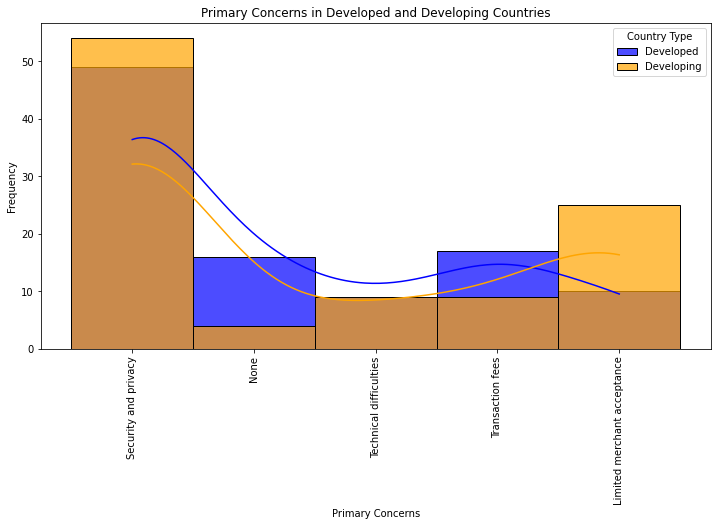

In [81]:
plt.figure(figsize=(12, 6))
sns.histplot(data=developed_df, x='What is your primary concern when it comes to using mobile payment services?', color='blue', alpha=0.7, label='Developed', kde=True)
sns.histplot(data=developing_df, x='What is your primary concern when it comes to using mobile payment services?', color='orange', alpha=0.7, label='Developing', kde=True)
plt.xlabel('Primary Concerns')
plt.ylabel('Frequency')
plt.title('Primary Concerns in Developed and Developing Countries')
plt.xticks(rotation=90)
plt.legend(title='Country Type')
plt.show()

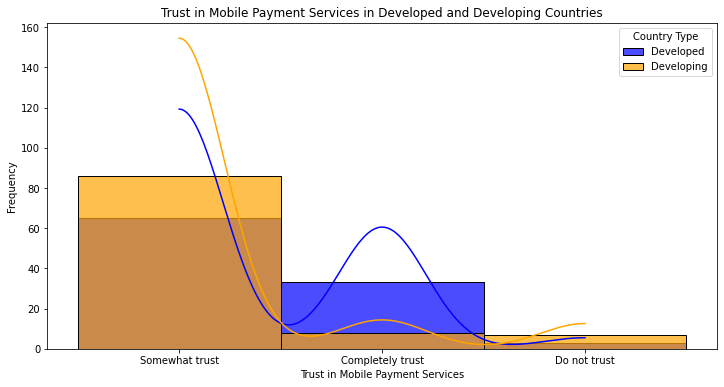

In [82]:
plt.figure(figsize=(12, 6))
sns.histplot(data=developed_df, x='How much do you trust mobile payment services?', color='blue', alpha=0.7, label='Developed', kde=True)
sns.histplot(data=developing_df, x='How much do you trust mobile payment services?', color='orange', alpha=0.7, label='Developing', kde=True)
plt.xlabel('Trust in Mobile Payment Services')
plt.ylabel('Frequency')
plt.title('Trust in Mobile Payment Services in Developed and Developing Countries')
plt.legend(title='Country Type')
plt.show()

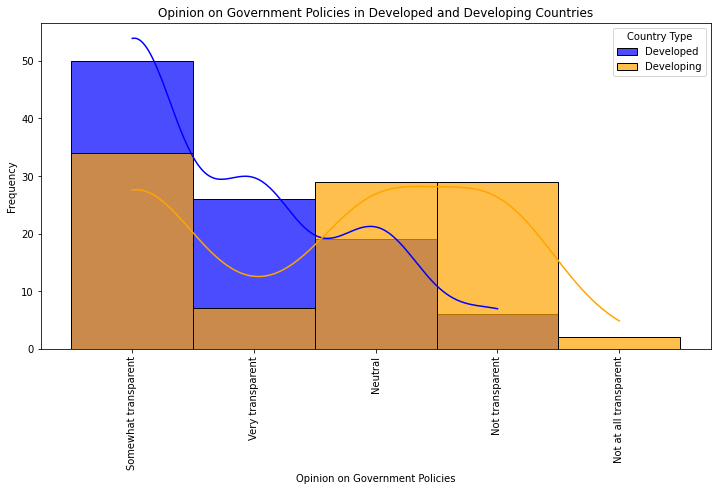

In [83]:
plt.figure(figsize=(12, 6))
sns.histplot(data=developed_df, x='Which of the following best describes your opinion on the transparency of fees and charges in your country?', color='blue', alpha=0.7, label='Developed', kde=True)
sns.histplot(data=developing_df, x='Which of the following best describes your opinion on the transparency of fees and charges in your country?', color='orange', alpha=0.7, label='Developing', kde=True)
plt.xlabel('Opinion on Government Policies')
plt.ylabel('Frequency')
plt.title('Opinion on Government Policies in Developed and Developing Countries')
plt.xticks(rotation=90)
plt.legend(title='Country Type')
plt.show()